In [1]:
import numpy as np
import scipy.stats
import scipy.ndimage.filters
import matplotlib.pyplot as plt
from GLMHMM import GLMHMMEstimator
from scipy.io import loadmat

In [2]:
num_samples = 5
num_states = 2
num_emissions = 2
num_feedbacks = 3
num_filter_bins = 30
num_steps = 1
filter_offset = 1

In [3]:
tau = 4
total_time = 10000
noiseSD = 0.1
stim_scale = 1
num_real_states = 2

In [4]:
stim = []
states = []
output_stim = []
output_trace = []

In [5]:
for ns in range(0, num_samples):
    output = np.zeros((num_real_states, total_time))
    
    stim_temp = np.zeros((num_filter_bins, total_time + num_filter_bins - 1, num_feedbacks))
    stim_temp[0, :, :] = scipy.ndimage.filters.gaussian_filter(np.random.randn(total_time + num_filter_bins - 1, num_feedbacks), stim_scale)

    for i in range(1, num_filter_bins):
        stim_temp[i, 0:total_time, :] = stim_temp[0, i:(total_time + i), :]
    
    stim.append(stim_temp[:, 0:total_time, :] + np.random.randn(num_filter_bins, total_time, num_feedbacks) * noiseSD)
    filt = scipy.stats.gamma.pdf(np.linspace(0, num_filter_bins), a = tau)[0:num_filter_bins]

    p1 = np.exp(np.matmul(stim[ns][:, :, 0].T, filt.T) + np.matmul(stim[ns][:, :, 1].T, -filt.T))
    output[0, :] = p1 / (1 + p1) > 0.5
    p2 = np.exp(np.matmul(stim[ns][:, :, 0].T, -filt.T) + np.matmul(stim[ns][:, :, 1].T, filt.T))
    output[1, :] = p2 / (1 + p2) > 0.5

    p3 = np.exp(np.matmul(stim[ns][:, :, 2].T, filt.T))
    states.append(p3 / (1 + p3) > 0.5)

    output_trace.append(np.zeros(total_time))
    for ss in range(0, num_real_states):
        output_trace[ns][states[ns] == ss] = output[ss][states[ns] == ss]

    final_stim = np.append(stim[ns][:, :, 0], stim[ns][:, :, 1], axis = 0)
    final_stim = np.append(final_stim, stim[ns][:, :, 2], axis = 0)
    final_stim = np.append(final_stim, np.ones((1, total_time)), axis = 0)
    output_stim.append(final_stim)

In [6]:
estimator = GLMHMMEstimator(num_samples = num_samples, num_states = num_states, num_emissions = num_emissions, num_feedbacks = num_feedbacks, num_filter_bins = num_filter_bins, num_steps = num_steps, filter_offset = filter_offset)
estimator.fit(output_stim, output_trace, [])

Fitting iteration:   1
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  3.428e-01  |  4.316e-02  |  1.889e-01  |  2.000e+00  |  1.000e+01  
  2.000e+00  |  3.157e-01  |  2.826e-02  |  1.915e-01  |  1.000e+00  |  1.000e+00  
  3.000e+00  |  2.976e-01  |  2.907e-02  |  2.369e-01  |  1.000e+00  |  1.000e+00  
  4.000e+00  |  2.833e-01  |  2.699e-02  |  4.218e-01  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  2.808e-01  |  1.533e-02  |  1.035e-01  |  2.000e+00  |  3.257e-01  
  6.000e+00  |  2.787e-01  |  4.436e-03  |  1.190e-01  |  1.000e+00  |  1.000e+00  
  7.000e+00  |  2.784e-01  |  2.825e-03  |  4.568e-02  |  1.000e+00  |  1.000e+00  
  8.000e+00  |  2.782e-01  |  2.755e-03  |  4.582e-02  |  1.000e+00  |  1.000e+00  
  9.000e+00  |  2.778e-01  |  3.712e-03  |  1.325e-01  |  1.000e+00

  4.000e+00  |  2.534e-01  |  4.247e-03  |  5.857e-02  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  2.533e-01  |  1.966e-03  |  1.479e-02  |  1.000e+00  |  1.000e+00  
  6.000e+00  |  2.532e-01  |  1.695e-03  |  1.776e-02  |  1.000e+00  |  1.000e+00  
  7.000e+00  |  2.530e-01  |  3.013e-03  |  6.651e-02  |  1.000e+00  |  1.000e+00  
  8.000e+00  |  2.528e-01  |  3.378e-03  |  9.867e-02  |  1.000e+00  |  1.000e+00  
  9.000e+00  |  2.527e-01  |  3.626e-03  |  6.786e-02  |  2.000e+00  |  4.430e-01  
  1.000e+01  |  2.526e-01  |  1.080e-03  |  4.026e-02  |  1.000e+00  |  1.000e+00  
  1.100e+01  |  2.526e-01  |  3.383e-04  |  6.201e-03  |  1.000e+00  |  1.000e+00  
  1.200e+01  |  2.526e-01  |  3.030e-04  |  3.526e-03  |  1.000e+00  |  1.000e+00  
  1.300e+01  |  2.526e-01  |  2.289e-04  |  4.955e-03  |  1.000e+00  |  1.000e+00  
  1.400e+01  |  2.526e-01  |  1.591e-04  |  7.249e-03  |  1.000e+00  |  1.000e+00  
  1.500e+01  |  2.526e-01  |  3.984e-04  |  8.286e-03  |  1.000e+00  |  1.00

  2.500e+01  |  1.957e-01  |  1.042e-05  |  1.028e-04  |  1.000e+00  |  1.000e+00  
  2.600e+01  |  1.957e-01  |  1.164e-05  |  4.184e-04  |  1.000e+00  |  1.000e+00  
  2.700e+01  |  1.957e-01  |  1.975e-05  |  3.376e-04  |  1.000e+00  |  1.000e+00  
==================================== Summary ======================================
Iterations: 27
Function Evaluations: 29
F: 0.1956748366355896
||g||: 1.9745804820558988e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.584e-01  |  2.880e-02  |  5.831e-03  |  1.000e+00  |  1.000e+00  
  2.000e+00  |  2.536e-01  |  6.301e-03  |  5.486e-02  |  1.000e+00  |  1.000e+00  
  3.000e+00  |  2.531e-01  |  4.064e-03  |  1.903e-02  |  1.000e+00  |  1.000e+00  
  4.000e+00  |  2.527e-01  |  2.494e-03  |  2.557e-02  |  1.000e+00  |  1.000e+00  
  5.000e+00  |  2.526e-01  |  1.660

  8.000e+00  |  1.121e-01  |  3.142e-03  |  6.670e-02  |  1.000e+00  |  1.000e+00  
  9.000e+00  |  1.112e-01  |  5.152e-03  |  1.468e-01  |  1.000e+00  |  1.000e+00  
  1.000e+01  |  1.106e-01  |  2.751e-03  |  7.894e-02  |  1.000e+00  |  1.000e+00  
  1.100e+01  |  1.104e-01  |  8.316e-04  |  2.268e-02  |  1.000e+00  |  1.000e+00  
  1.200e+01  |  1.103e-01  |  3.132e-04  |  1.122e-02  |  1.000e+00  |  1.000e+00  
  1.300e+01  |  1.103e-01  |  2.455e-04  |  2.232e-03  |  1.000e+00  |  1.000e+00  
  1.400e+01  |  1.103e-01  |  2.343e-04  |  2.480e-03  |  1.000e+00  |  1.000e+00  
  1.500e+01  |  1.103e-01  |  2.477e-04  |  3.555e-03  |  1.000e+00  |  1.000e+00  
  1.600e+01  |  1.103e-01  |  3.519e-04  |  3.208e-03  |  2.000e+00  |  4.785e-01  
  1.700e+01  |  1.103e-01  |  1.263e-04  |  3.286e-03  |  1.000e+00  |  1.000e+00  
  1.800e+01  |  1.103e-01  |  1.021e-04  |  1.036e-03  |  1.000e+00  |  1.000e+00  
  1.900e+01  |  1.103e-01  |  1.207e-04  |  2.725e-03  |  1.000e+00  |  1.00

  2.000e+01  |  5.860e-02  |  2.089e-04  |  3.812e-03  |  1.000e+00  |  1.000e+00  
  2.100e+01  |  5.860e-02  |  1.016e-04  |  2.158e-03  |  1.000e+00  |  1.000e+00  
  2.200e+01  |  5.860e-02  |  1.014e-04  |  1.149e-03  |  1.000e+00  |  1.000e+00  
  2.300e+01  |  5.859e-02  |  1.147e-04  |  1.718e-03  |  1.000e+00  |  1.000e+00  
  2.400e+01  |  5.859e-02  |  1.210e-04  |  2.694e-03  |  1.000e+00  |  1.000e+00  
  2.500e+01  |  5.859e-02  |  4.345e-05  |  1.138e-03  |  1.000e+00  |  1.000e+00  
  2.600e+01  |  5.859e-02  |  3.922e-05  |  4.902e-04  |  1.000e+00  |  1.000e+00  
  2.700e+01  |  5.859e-02  |  3.988e-05  |  6.609e-04  |  1.000e+00  |  1.000e+00  
  2.800e+01  |  5.859e-02  |  2.516e-05  |  1.100e-03  |  1.000e+00  |  1.000e+00  
  2.900e+01  |  5.859e-02  |  2.619e-05  |  8.226e-04  |  1.000e+00  |  1.000e+00  
  3.000e+01  |  5.859e-02  |  2.453e-05  |  3.266e-04  |  1.000e+00  |  1.000e+00  
  3.100e+01  |  5.859e-02  |  6.080e-06  |  2.163e-04  |  1.000e+00  |  1.00

  1.200e+01  |  3.888e-02  |  7.431e-04  |  2.698e-02  |  1.000e+00  |  1.000e+00  
  1.300e+01  |  3.874e-02  |  1.147e-03  |  3.154e-02  |  1.000e+00  |  1.000e+00  
  1.400e+01  |  3.857e-02  |  1.499e-03  |  4.284e-02  |  1.000e+00  |  1.000e+00  
  1.500e+01  |  3.840e-02  |  1.460e-03  |  4.904e-02  |  1.000e+00  |  1.000e+00  
  1.600e+01  |  3.832e-02  |  9.988e-04  |  2.527e-02  |  2.000e+00  |  4.858e-01  
  1.700e+01  |  3.827e-02  |  4.198e-04  |  8.519e-03  |  1.000e+00  |  1.000e+00  
  1.800e+01  |  3.826e-02  |  1.216e-04  |  1.111e-02  |  1.000e+00  |  1.000e+00  
  1.900e+01  |  3.826e-02  |  1.244e-04  |  2.214e-03  |  1.000e+00  |  1.000e+00  
  2.000e+01  |  3.826e-02  |  1.443e-04  |  3.618e-03  |  1.000e+00  |  1.000e+00  
  2.100e+01  |  3.825e-02  |  1.446e-04  |  3.879e-03  |  1.000e+00  |  1.000e+00  
  2.200e+01  |  3.825e-02  |  1.676e-04  |  7.083e-03  |  1.000e+00  |  1.000e+00  
  2.300e+01  |  3.825e-02  |  1.673e-04  |  7.170e-03  |  1.000e+00  |  1.00

  2.000e+01  |  1.573e-02  |  1.365e-03  |  4.281e-02  |  1.000e+00  |  1.000e+00  
  2.100e+01  |  1.539e-02  |  1.513e-03  |  5.336e-02  |  1.000e+00  |  1.000e+00  
  2.200e+01  |  1.522e-02  |  1.424e-03  |  3.670e-02  |  2.000e+00  |  3.916e-01  
  2.300e+01  |  1.500e-02  |  7.938e-04  |  2.969e-02  |  1.000e+00  |  1.000e+00  
  2.400e+01  |  1.491e-02  |  2.451e-04  |  1.724e-02  |  1.000e+00  |  1.000e+00  
  2.500e+01  |  1.489e-02  |  1.957e-04  |  8.080e-03  |  1.000e+00  |  1.000e+00  
  2.600e+01  |  1.487e-02  |  2.777e-04  |  9.497e-03  |  1.000e+00  |  1.000e+00  
  2.700e+01  |  1.485e-02  |  3.611e-04  |  1.692e-02  |  1.000e+00  |  1.000e+00  
  2.800e+01  |  1.480e-02  |  3.716e-04  |  2.767e-02  |  1.000e+00  |  1.000e+00  
  2.900e+01  |  1.478e-02  |  4.486e-04  |  1.166e-02  |  2.000e+00  |  2.972e-01  
  3.000e+01  |  1.473e-02  |  2.294e-04  |  2.034e-02  |  1.000e+00  |  1.000e+00  
  3.100e+01  |  1.470e-02  |  8.887e-05  |  9.071e-03  |  1.000e+00  |  1.00

  1.200e+02  |  8.688e-03  |  7.427e-05  |  3.698e-04  |  5.000e+00  |  6.745e+02  
  1.210e+02  |  8.687e-03  |  6.757e-05  |  5.334e-05  |  4.000e+00  |  8.886e+01  
  1.220e+02  |  8.686e-03  |  6.275e-05  |  1.961e-04  |  5.000e+00  |  3.590e+02  
  1.230e+02  |  8.678e-03  |  1.169e-04  |  1.196e-03  |  6.000e+00  |  2.357e+03  
  1.240e+02  |  8.677e-03  |  8.346e-05  |  9.040e-05  |  4.000e+00  |  9.578e+01  
  1.250e+02  |  8.676e-03  |  6.948e-05  |  6.643e-05  |  4.000e+00  |  9.862e+01  
  1.260e+02  |  8.675e-03  |  6.213e-05  |  1.534e-04  |  5.000e+00  |  2.736e+02  
  1.270e+02  |  8.652e-03  |  3.590e-04  |  4.733e-03  |  6.000e+00  |  9.440e+03  
  1.280e+02  |  8.646e-03  |  2.642e-04  |  1.588e-04  |  3.000e+00  |  5.505e+01  
  1.290e+02  |  8.641e-03  |  1.711e-04  |  1.622e-04  |  3.000e+00  |  7.645e+01  
  1.300e+02  |  8.641e-03  |  1.512e-04  |  3.755e-05  |  3.000e+00  |  2.732e+01  
  1.310e+02  |  8.640e-03  |  1.326e-04  |  3.680e-05  |  3.000e+00  |  3.03

  3.140e+02  |  7.763e-03  |  5.810e-05  |  1.161e-04  |  4.000e+00  |  3.030e+02  
  3.150e+02  |  7.763e-03  |  4.737e-05  |  6.876e-05  |  4.000e+00  |  1.668e+02  
  3.160e+02  |  7.762e-03  |  4.975e-05  |  1.352e-04  |  5.000e+00  |  4.022e+02  
  3.170e+02  |  7.762e-03  |  4.662e-05  |  5.383e-05  |  4.000e+00  |  1.526e+02  
  3.180e+02  |  7.716e-03  |  6.551e-04  |  1.162e-02  |  7.000e+00  |  3.512e+04  
  3.190e+02  |  7.688e-03  |  1.751e-04  |  4.595e-04  |  3.000e+00  |  1.000e+02  
  3.200e+02  |  7.688e-03  |  1.366e-04  |  3.951e-05  |  3.000e+00  |  3.217e+01  
  3.210e+02  |  7.687e-03  |  8.881e-05  |  5.274e-05  |  3.000e+00  |  5.505e+01  
  3.220e+02  |  7.686e-03  |  6.735e-05  |  2.933e-05  |  3.000e+00  |  4.709e+01  
  3.230e+02  |  7.686e-03  |  5.405e-05  |  2.626e-05  |  4.000e+00  |  5.559e+01  
  3.240e+02  |  7.686e-03  |  4.588e-05  |  6.224e-05  |  4.000e+00  |  1.642e+02  
  3.250e+02  |  7.680e-03  |  1.692e-04  |  1.163e-03  |  6.000e+00  |  3.61

  8.800e+01  |  6.669e-03  |  4.974e-05  |  7.750e-05  |  4.000e+00  |  1.540e+02  
  8.900e+01  |  6.669e-03  |  4.169e-05  |  3.888e-05  |  4.000e+00  |  1.337e+02  
  9.000e+01  |  6.668e-03  |  4.314e-05  |  1.577e-04  |  5.000e+00  |  6.470e+02  
  9.100e+01  |  6.668e-03  |  3.776e-05  |  7.757e-05  |  4.000e+00  |  3.075e+02  
  9.200e+01  |  6.635e-03  |  3.333e-04  |  7.551e-03  |  7.000e+00  |  3.420e+04  
  9.300e+01  |  6.630e-03  |  2.535e-04  |  1.065e-04  |  3.000e+00  |  5.505e+01  
  9.400e+01  |  6.628e-03  |  2.221e-04  |  4.459e-05  |  3.000e+00  |  3.030e+01  
  9.500e+01  |  6.626e-03  |  1.875e-04  |  5.062e-05  |  3.000e+00  |  3.926e+01  
  9.600e+01  |  6.625e-03  |  1.658e-04  |  3.299e-05  |  3.000e+00  |  3.030e+01  
  9.700e+01  |  6.624e-03  |  1.321e-04  |  5.299e-05  |  3.000e+00  |  5.505e+01  
  9.800e+01  |  6.622e-03  |  6.078e-05  |  1.272e-04  |  4.000e+00  |  1.659e+02  
  9.900e+01  |  6.621e-03  |  4.288e-05  |  5.017e-05  |  4.000e+00  |  1.42

  1.090e+02  |  6.329e-03  |  1.157e-04  |  1.346e-04  |  3.000e+00  |  8.074e+01  
  1.100e+02  |  6.326e-03  |  8.183e-05  |  3.954e-04  |  4.000e+00  |  2.689e+02  
  1.110e+02  |  6.320e-03  |  1.017e-04  |  1.398e-03  |  5.000e+00  |  1.346e+03  
  1.120e+02  |  6.317e-03  |  7.551e-05  |  4.007e-04  |  4.000e+00  |  3.108e+02  
  1.130e+02  |  6.316e-03  |  7.116e-05  |  2.901e-04  |  4.000e+00  |  3.030e+02  
  1.140e+02  |  6.305e-03  |  9.779e-05  |  2.140e-03  |  5.000e+00  |  2.372e+03  
  1.150e+02  |  6.304e-03  |  8.787e-05  |  6.810e-05  |  3.000e+00  |  5.505e+01  
  1.160e+02  |  6.303e-03  |  7.564e-05  |  1.417e-04  |  4.000e+00  |  1.275e+02  
  1.170e+02  |  6.300e-03  |  7.968e-05  |  6.563e-04  |  5.000e+00  |  6.859e+02  
  1.180e+02  |  6.300e-03  |  7.311e-05  |  9.199e-05  |  4.000e+00  |  9.131e+01  
  1.190e+02  |  6.297e-03  |  8.225e-05  |  5.864e-04  |  5.000e+00  |  6.345e+02  
  1.200e+02  |  6.296e-03  |  7.228e-05  |  1.187e-04  |  4.000e+00  |  1.14

  5.100e+01  |  1.025e-02  |  2.497e-04  |  4.091e-03  |  5.000e+00  |  1.046e+03  
  5.200e+01  |  1.024e-02  |  2.156e-04  |  2.219e-04  |  3.000e+00  |  4.363e+01  
  5.300e+01  |  1.024e-02  |  1.912e-04  |  3.580e-04  |  3.000e+00  |  8.151e+01  
  5.400e+01  |  1.019e-02  |  5.146e-04  |  7.040e-03  |  5.000e+00  |  1.808e+03  
  5.500e+01  |  1.018e-02  |  3.228e-04  |  5.731e-04  |  3.000e+00  |  5.505e+01  
  5.600e+01  |  1.018e-02  |  2.521e-04  |  2.824e-04  |  3.000e+00  |  4.325e+01  
  5.700e+01  |  1.017e-02  |  2.254e-04  |  1.545e-04  |  3.000e+00  |  3.030e+01  
  5.800e+01  |  1.017e-02  |  1.992e-04  |  2.366e-04  |  3.000e+00  |  5.191e+01  
  5.900e+01  |  1.017e-02  |  1.849e-04  |  5.701e-04  |  4.000e+00  |  1.416e+02  
  6.000e+01  |  9.757e-03  |  1.529e-03  |  6.600e-02  |  6.000e+00  |  1.767e+04  
  6.100e+01  |  9.612e-03  |  3.908e-04  |  2.901e-03  |  3.000e+00  |  1.000e+02  
  6.200e+01  |  9.603e-03  |  2.174e-04  |  5.711e-04  |  3.000e+00  |  7.70

  2.450e+02  |  6.859e-03  |  6.320e-05  |  5.251e-04  |  5.000e+00  |  6.023e+02  
  2.460e+02  |  6.855e-03  |  8.169e-05  |  8.168e-04  |  5.000e+00  |  1.033e+03  
  2.470e+02  |  6.855e-03  |  7.049e-05  |  7.513e-05  |  4.000e+00  |  7.354e+01  
  2.480e+02  |  6.853e-03  |  7.204e-05  |  3.832e-04  |  5.000e+00  |  4.346e+02  
  2.490e+02  |  6.852e-03  |  6.385e-05  |  2.729e-04  |  4.000e+00  |  3.030e+02  
  2.500e+02  |  6.847e-03  |  1.791e-04  |  1.590e-03  |  6.000e+00  |  1.992e+03  
  2.510e+02  |  6.846e-03  |  1.533e-04  |  7.459e-05  |  3.000e+00  |  3.337e+01  
  2.520e+02  |  6.845e-03  |  1.317e-04  |  6.598e-05  |  3.000e+00  |  3.448e+01  
  2.530e+02  |  6.845e-03  |  1.129e-04  |  6.168e-05  |  3.000e+00  |  3.754e+01  
  2.540e+02  |  6.844e-03  |  1.008e-04  |  4.414e-05  |  3.000e+00  |  3.133e+01  
  2.550e+02  |  6.843e-03  |  6.084e-05  |  2.402e-04  |  4.000e+00  |  1.910e+02  
  2.560e+02  |  6.826e-03  |  1.285e-04  |  3.908e-03  |  6.000e+00  |  5.14

  4.390e+02  |  5.520e-03  |  2.508e-05  |  2.797e-07  |  6.000e+00  |  1.273e+00  
==================================== Summary ======================================
Iterations: 439
Function Evaluations: 1782
F: 0.005520465783774853
||g||: 2.5084093067562208e-05
Log likelihood: 1173.8939896850318
Fitting iteration:   10
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.932e-03  |  3.364e-04  |  1.358e-04  |  3.000e+00  |  5.505e+01  
  2.000e+00  |  5.926e-03  |  2.888e-04  |  1.096e-04  |  3.000e+00  |  5.505e+01  
  3.000e+00  |  5.919e-03  |  2.404e-04  |  1.710e-04  |  3.000e+00  |  1.000e+02  
  4.000e+00  |  5.904e-03  |  1.880e-04  |  4.077e-04  |  4.000e+00  |  2.865e+02  
  5.000e+00  |  5.885e-03  |  2.228e-04  |  1.113e-03  |  4.000e+00  |  1.000e+03  
  6.000e+00  |  5.

  5.400e+01  |  3.910e-03  |  5.151e-05  |  5.140e-05  |  4.000e+00  |  9.294e+01  
  5.500e+01  |  3.910e-03  |  4.194e-05  |  5.708e-05  |  4.000e+00  |  1.281e+02  
  5.600e+01  |  3.909e-03  |  3.810e-05  |  4.644e-05  |  5.000e+00  |  1.280e+02  
  5.700e+01  |  3.907e-03  |  8.085e-05  |  6.959e-04  |  5.000e+00  |  2.111e+03  
  5.800e+01  |  3.907e-03  |  4.994e-05  |  1.121e-04  |  4.000e+00  |  1.604e+02  
  5.900e+01  |  3.906e-03  |  3.939e-05  |  7.199e-05  |  4.000e+00  |  1.668e+02  
  6.000e+01  |  3.906e-03  |  3.647e-05  |  6.318e-05  |  6.000e+00  |  1.856e+02  
  6.100e+01  |  3.904e-03  |  5.138e-05  |  6.707e-04  |  5.000e+00  |  2.128e+03  
  6.200e+01  |  3.903e-03  |  4.606e-05  |  3.019e-05  |  4.000e+00  |  6.802e+01  
  6.300e+01  |  3.903e-03  |  3.599e-05  |  1.258e-04  |  5.000e+00  |  3.161e+02  
  6.400e+01  |  3.889e-03  |  1.639e-04  |  5.185e-03  |  6.000e+00  |  1.668e+04  
  6.500e+01  |  3.885e-03  |  1.127e-04  |  2.474e-04  |  4.000e+00  |  1.75

  2.000e+00  |  3.907e-03  |  1.090e-04  |  6.190e-04  |  4.000e+00  |  5.505e+02  
  3.000e+00  |  3.906e-03  |  9.353e-05  |  9.750e-05  |  4.000e+00  |  1.036e+02  
  4.000e+00  |  3.904e-03  |  7.852e-05  |  1.898e-04  |  4.000e+00  |  2.349e+02  
  5.000e+00  |  3.896e-03  |  7.919e-05  |  1.131e-03  |  5.000e+00  |  1.668e+03  
  6.000e+00  |  3.894e-03  |  6.364e-05  |  2.125e-04  |  4.000e+00  |  3.109e+02  
  7.000e+00  |  3.867e-03  |  7.166e-05  |  4.560e-03  |  6.000e+00  |  8.300e+03  
  8.000e+00  |  3.865e-03  |  6.222e-05  |  3.397e-04  |  4.000e+00  |  5.505e+02  
  9.000e+00  |  3.865e-03  |  5.397e-05  |  8.401e-05  |  4.000e+00  |  1.568e+02  
  1.000e+01  |  3.863e-03  |  5.543e-05  |  3.691e-04  |  5.000e+00  |  7.942e+02  
  1.100e+01  |  3.862e-03  |  4.986e-05  |  7.957e-05  |  4.000e+00  |  1.668e+02  
  1.200e+01  |  3.859e-03  |  6.871e-05  |  6.837e-04  |  5.000e+00  |  1.593e+03  
  1.300e+01  |  3.858e-03  |  4.751e-05  |  1.407e-04  |  4.000e+00  |  2.38

P:\ENI Projects\Jan\pyGLMHMM_v3\_trans_learning_stats.py:50: RuntimeWarning: overflow encountered in multiply
  hess[i, i, :] = np.sum(np.tile(np.reshape(stim[trial]['gamma'][state_num, 0:-1] * (norm * np.exp(filtpower[set_order[i], :]) - np.exp(2 * filtpower[set_order[i], :])) / np.power(norm, 2), (1, 1, T), order = 'F'), (1, num_bins, 1)) * data_vec, axis = 2)
P:\ENI Projects\Jan\pyGLMHMM_v3\_trans_learning_stats.py:50: RuntimeWarning: invalid value encountered in subtract
  hess[i, i, :] = np.sum(np.tile(np.reshape(stim[trial]['gamma'][state_num, 0:-1] * (norm * np.exp(filtpower[set_order[i], :]) - np.exp(2 * filtpower[set_order[i], :])) / np.power(norm, 2), (1, 1, T), order = 'F'), (1, num_bins, 1)) * data_vec, axis = 2)
P:\ENI Projects\Jan\pyGLMHMM_v3\_trans_learning_stats.py:50: RuntimeWarning: overflow encountered in power
  hess[i, i, :] = np.sum(np.tile(np.reshape(stim[trial]['gamma'][state_num, 0:-1] * (norm * np.exp(filtpower[set_order[i], :]) - np.exp(2 * filtpower[set_orde

Log likelihood: 890.475863979065
Fitting iteration:   11
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.621e-03  |  6.654e-05  |  1.651e-05  |  3.000e+00  |  3.702e+01  
  2.000e+00  |  5.621e-03  |  5.998e-05  |  1.156e-05  |  3.000e+00  |  3.030e+01  
  3.000e+00  |  5.621e-03  |  4.622e-05  |  3.428e-05  |  4.000e+00  |  9.961e+01  
  4.000e+00  |  5.620e-03  |  7.612e-05  |  2.286e-04  |  5.000e+00  |  8.621e+02  
  5.000e+00  |  5.619e-03  |  5.480e-05  |  2.809e-05  |  4.000e+00  |  6.432e+01  
  6.000e+00  |  5.619e-03  |  4.353e-05  |  2.160e-05  |  4.000e+00  |  6.875e+01  
  7.000e+00  |  5.619e-03  |  3.615e-05  |  3.669e-05  |  4.000e+00  |  1.470e+02  
  8.000e+00  |  5.616e-03  |  4.992e-05  |  4.603e-04  |  6.000e+00  |  2.220e+03  
  9.000e+00  |  5.616e-03  |  3.5

  5.500e+01  |  2.728e-03  |  2.013e-05  |  7.544e-05  |  5.000e+00  |  4.639e+02  
  5.600e+01  |  2.727e-03  |  2.124e-05  |  2.484e-04  |  6.000e+00  |  1.944e+03  
  5.700e+01  |  2.726e-03  |  2.279e-05  |  2.019e-04  |  6.000e+00  |  1.498e+03  
  5.800e+01  |  2.726e-03  |  2.502e-05  |  2.005e-04  |  5.000e+00  |  1.387e+03  
  5.900e+01  |  2.726e-03  |  2.102e-05  |  4.752e-05  |  5.000e+00  |  2.994e+02  
  6.000e+01  |  2.725e-03  |  3.506e-05  |  3.809e-04  |  6.000e+00  |  2.856e+03  
  6.100e+01  |  2.724e-03  |  2.166e-05  |  8.790e-05  |  5.000e+00  |  3.953e+02  
  6.200e+01  |  2.724e-03  |  1.984e-05  |  1.089e-04  |  5.000e+00  |  7.929e+02  
  6.300e+01  |  2.722e-03  |  3.058e-05  |  5.798e-04  |  7.000e+00  |  4.609e+03  
  6.400e+01  |  2.722e-03  |  2.526e-05  |  3.459e-05  |  4.000e+00  |  1.785e+02  
  6.500e+01  |  2.722e-03  |  2.251e-05  |  2.687e-05  |  5.000e+00  |  1.678e+02  
  6.600e+01  |  2.722e-03  |  2.026e-05  |  4.081e-05  |  5.000e+00  |  2.86

  4.000e+01  |  2.858e-03  |  4.053e-05  |  4.046e-05  |  4.000e+00  |  1.244e+02  
  4.100e+01  |  2.858e-03  |  3.510e-05  |  3.099e-05  |  4.000e+00  |  1.144e+02  
  4.200e+01  |  2.857e-03  |  2.276e-05  |  1.057e-04  |  5.000e+00  |  4.508e+02  
  4.300e+01  |  2.857e-03  |  2.275e-05  |  2.186e-07  |  9.000e+00  |  1.353e+00  
==================================== Summary ======================================
Iterations: 43
Function Evaluations: 210
F: 0.002857436425983906
||g||: 2.275363112858031e-05
Log likelihood: 837.461043103854
Fitting iteration:   13
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.289e-03  |  3.646e-05  |  1.246e-04  |  5.000e+00  |  7.029e+02  
  2.000e+00  |  5.289e-03  |  3.190e-05  |  2.599e-05  |  5.000e+00  |  1.314e+02  
  3.000e+00  |  5.287e-

Iterations: 1
Function Evaluations: 10
F: 0.0026968044694513083
||g||: 1.9236280422774144e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.771e-03  |  2.223e-05  |  1.855e-04  |  6.000e+00  |  1.381e+03  
  2.000e+00  |  2.771e-03  |  2.013e-05  |  5.246e-05  |  5.000e+00  |  3.618e+02  
  3.000e+00  |  2.761e-03  |  8.102e-05  |  3.655e-03  |  7.000e+00  |  2.783e+04  
  4.000e+00  |  2.760e-03  |  3.191e-05  |  1.596e-04  |  4.000e+00  |  3.030e+02  
  5.000e+00  |  2.760e-03  |  2.848e-05  |  1.883e-05  |  4.000e+00  |  9.079e+01  
  6.000e+00  |  2.759e-03  |  2.073e-05  |  7.812e-05  |  5.000e+00  |  4.220e+02  
  7.000e+00  |  2.757e-03  |  4.889e-05  |  9.068e-04  |  7.000e+00  |  6.730e+03  
  8.000e+00  |  2.757e-03  |  3.938e-05  |  5.294e-05  |  4.000e+00  |  1.668e+02  
  9.000e+00  |  2.756e-03  |  2.0

  3.000e+00  |  5.846e-03  |  3.329e-05  |  3.003e-05  |  4.000e+00  |  1.391e+02  
  4.000e+00  |  5.833e-03  |  1.749e-04  |  2.405e-03  |  7.000e+00  |  1.324e+04  
  5.000e+00  |  5.832e-03  |  1.153e-04  |  5.239e-05  |  3.000e+00  |  5.505e+01  
  6.000e+00  |  5.832e-03  |  9.480e-05  |  1.901e-05  |  3.000e+00  |  3.030e+01  
  7.000e+00  |  5.831e-03  |  7.881e-05  |  1.563e-05  |  3.000e+00  |  3.030e+01  
  8.000e+00  |  5.831e-03  |  5.125e-05  |  3.045e-05  |  4.000e+00  |  7.099e+01  
  9.000e+00  |  5.831e-03  |  4.586e-05  |  8.455e-06  |  3.000e+00  |  3.030e+01  
==================================== Summary ======================================
Iterations: 9
Function Evaluations: 35
F: 0.005830918904393911
||g||: 4.5864209823776037e-05
Fitting state transition filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
 

Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.761e-03  |  3.561e-05  |  3.349e-05  |  4.000e+00  |  1.276e+02  
  2.000e+00  |  5.760e-03  |  3.358e-05  |  7.868e-05  |  5.000e+00  |  4.106e+02  
  3.000e+00  |  5.760e-03  |  3.273e-05  |  4.433e-05  |  5.000e+00  |  2.454e+02  
  4.000e+00  |  5.757e-03  |  1.863e-04  |  1.012e-03  |  6.000e+00  |  5.751e+03  
  5.000e+00  |  5.755e-03  |  1.232e-04  |  5.512e-05  |  3.000e+00  |  5.505e+01  
  6.000e+00  |  5.754e-03  |  8.360e-05  |  3.645e-05  |  3.000e+00  |  5.505e+01  
  7.000e+00  |  5.754e-03  |  6.012e-05  |  2.420e-05  |  4.000e+00  |  5.386e+01  
  8.000e+00  |  5.754e-03  |  4.428e-05  |  2.065e-05  |  4.000e+00  |  6.392e+01  
  9.000e+00  |  5.754e-03  |  3.378e-05  |  2.645e-05  |  4.000e+00  |  1.112e+02  
  1.000e+01  |  5.753e-03  |  3.299e-05  | 

F: 0.00271963351406157
||g||: 2.2789590730099007e-05
Log likelihood: 801.1995781927374
Fitting iteration:   24
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.038e-03  |  2.922e-05  |  2.074e-05  |  5.000e+00  |  1.093e+02  
  2.000e+00  |  5.037e-03  |  3.099e-05  |  6.843e-05  |  6.000e+00  |  4.516e+02  
  3.000e+00  |  5.037e-03  |  2.910e-05  |  4.920e-05  |  5.000e+00  |  3.062e+02  
  4.000e+00  |  5.037e-03  |  2.906e-05  |  3.434e-07  |  1.000e+01  |  2.291e+00  
==================================== Summary ======================================
Iterations: 4
Function Evaluations: 27
F: 0.00503717502579093
||g||: 2.9060356609988958e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
----------------------

  1.900e+01  |  5.603e-03  |  3.565e-05  |  2.059e-05  |  4.000e+00  |  8.274e+01  
  2.000e+01  |  5.603e-03  |  3.394e-05  |  5.553e-05  |  5.000e+00  |  2.972e+02  
  2.100e+01  |  5.602e-03  |  3.340e-05  |  5.435e-05  |  5.000e+00  |  3.055e+02  
  2.200e+01  |  5.602e-03  |  3.083e-05  |  2.061e-05  |  5.000e+00  |  1.178e+02  
  2.300e+01  |  5.598e-03  |  1.468e-04  |  1.087e-03  |  6.000e+00  |  6.728e+03  
  2.400e+01  |  5.597e-03  |  1.301e-04  |  1.463e-05  |  3.000e+00  |  1.905e+01  
  2.500e+01  |  5.597e-03  |  1.069e-04  |  2.063e-05  |  3.000e+00  |  3.030e+01  
  2.600e+01  |  5.596e-03  |  8.849e-05  |  1.699e-05  |  3.000e+00  |  3.035e+01  
  2.700e+01  |  5.596e-03  |  7.793e-05  |  1.014e-05  |  3.000e+00  |  2.188e+01  
  2.800e+01  |  5.596e-03  |  6.623e-05  |  1.179e-05  |  3.000e+00  |  2.889e+01  
  2.900e+01  |  5.596e-03  |  5.792e-05  |  9.044e-06  |  3.000e+00  |  2.608e+01  
==================================== Summary ===============================

  1.000e+01  |  2.649e-03  |  1.897e-05  |  1.774e-07  |  6.000e+00  |  1.404e+00  
==================================== Summary ======================================
Iterations: 10
Function Evaluations: 52
F: 0.0026490543968975544
||g||: 1.8968792574014515e-05
Log likelihood: 785.2848800034777
Fitting iteration:   30
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  4.998e-03  |  3.594e-05  |  1.206e-05  |  5.000e+00  |  5.632e+01  
  2.000e+00  |  4.998e-03  |  3.201e-05  |  1.221e-05  |  4.000e+00  |  6.604e+01  
  3.000e+00  |  4.998e-03  |  2.889e-05  |  1.777e-05  |  4.000e+00  |  1.079e+02  
  4.000e+00  |  4.998e-03  |  2.887e-05  |  2.715e-07  |  9.000e+00  |  1.800e+00  
==================================== Summary ======================================
Iterations: 4
Functio

  2.800e+01  |  5.399e-03  |  2.949e-05  |  1.934e-05  |  4.000e+00  |  1.192e+02  
  2.900e+01  |  5.397e-03  |  5.219e-05  |  3.249e-04  |  6.000e+00  |  2.177e+03  
  3.000e+01  |  5.397e-03  |  4.530e-05  |  8.553e-06  |  4.000e+00  |  3.242e+01  
==================================== Summary ======================================
Iterations: 30
Function Evaluations: 133
F: 0.005396833643317223
||g||: 4.529849684331566e-05
Fitting state transition filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.556e-03  |  1.876e-05  |  1.414e-07  |  6.000e+00  |  1.376e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 7
F: 0.002556134946644306
||g||: 1.876450733107049e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |

Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.628e-03  |  5.739e-05  |  5.224e-04  |  6.000e+00  |  4.319e+03  
  2.000e+00  |  2.627e-03  |  4.429e-05  |  4.030e-05  |  4.000e+00  |  1.126e+02  
  3.000e+00  |  2.627e-03  |  3.334e-05  |  3.734e-05  |  4.000e+00  |  1.352e+02  
  4.000e+00  |  2.627e-03  |  2.126e-05  |  5.626e-05  |  5.000e+00  |  2.706e+02  
  5.000e+00  |  2.626e-03  |  2.585e-05  |  1.588e-04  |  6.000e+00  |  1.198e+03  
  6.000e+00  |  2.626e-03  |  1.880e-05  |  5.464e-05  |  5.000e+00  |  3.389e+02  
  7.000e+00  |  2.626e-03  |  2.008e-05  |  1.562e-04  |  6.000e+00  |  1.333e+03  
  8.000e+00  |  2.625e-03  |  3.229e-05  |  2.313e-04  |  6.000e+00  |  1.847e+03  
  9.000e+00  |  2.625e-03  |  2.000e-05  |  6.098e-05  |  4.000e+00  |  3.030e+02  
  1.000e+01  |  2.625e-03  |  3.362e-05  | 

  4.000e+00  |  2.563e-03  |  3.478e-05  |  9.799e-05  |  4.000e+00  |  3.030e+02  
  5.000e+00  |  2.562e-03  |  1.939e-05  |  1.675e-04  |  5.000e+00  |  7.893e+02  
  6.000e+00  |  2.562e-03  |  1.938e-05  |  1.555e-07  |  6.000e+00  |  1.473e+00  
==================================== Summary ======================================
Iterations: 6
Function Evaluations: 32
F: 0.0025621680542826653
||g||: 1.938350214913953e-05
Log likelihood: 767.5055448420853
Fitting iteration:   40
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  4.966e-03  |  2.747e-05  |  2.085e-07  |  9.000e+00  |  1.482e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 10
F: 0.004965856671333313
||g||: 2.7474841772345826e-05
Solving the Mi

    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.262e-03  |  2.062e-04  |  2.414e-03  |  7.000e+00  |  1.779e+04  
  2.000e+00  |  5.260e-03  |  1.446e-04  |  5.306e-05  |  3.000e+00  |  5.212e+01  
  3.000e+00  |  5.259e-03  |  1.173e-04  |  2.409e-05  |  3.000e+00  |  3.373e+01  
  4.000e+00  |  5.259e-03  |  9.310e-05  |  2.191e-05  |  3.000e+00  |  3.784e+01  
  5.000e+00  |  5.258e-03  |  4.814e-05  |  4.452e-05  |  4.000e+00  |  9.684e+01  
  6.000e+00  |  5.258e-03  |  4.291e-05  |  7.191e-06  |  3.000e+00  |  3.026e+01  
==================================== Summary ======================================
Iterations: 6
Function Evaluations: 24
F: 0.005258001387119293
||g||: 4.290553988539614e-05
Fitting state transition filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
--

  1.000e+00  |  5.256e-03  |  2.905e-05  |  2.745e-07  |  1.000e+01  |  1.878e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 11
F: 0.005255545023828745
||g||: 2.9050695957266726e-05
Fitting state transition filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.526e-03  |  1.885e-05  |  1.368e-07  |  6.000e+00  |  1.387e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 7
F: 0.00252620130777359
||g||: 1.8846372768166475e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.520e-03  |  2.119e-05  |  1

    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.525e-03  |  1.808e-05  |  1.206e-04  |  5.000e+00  |  1.146e+03  
  2.000e+00  |  2.525e-03  |  1.807e-05  |  1.297e-07  |  6.000e+00  |  1.301e+00  
==================================== Summary ======================================
Iterations: 2
Function Evaluations: 12
F: 0.002525269752368331
||g||: 1.8072767488774844e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.501e-03  |  1.780e-05  |  3.133e-05  |  4.000e+00  |  2.696e+02  
  2.000e+00  |  2.501e-03  |  1.779e-05  |  1.284e-07  |  6.000e+00  |  1.277e+00  
==================================== Summary ======================================
Iterations: 2
Function Evaluations

  9.000e+00  |  2.455e-03  |  1.982e-05  |  3.123e-05  |  5.000e+00  |  2.326e+02  
  1.000e+01  |  2.455e-03  |  1.748e-05  |  9.863e-05  |  7.000e+00  |  8.534e+02  
  1.100e+01  |  2.454e-03  |  1.905e-05  |  1.471e-04  |  6.000e+00  |  1.443e+03  
  1.200e+01  |  2.454e-03  |  1.736e-05  |  8.225e-05  |  5.000e+00  |  7.408e+02  
  1.300e+01  |  2.454e-03  |  2.794e-05  |  2.339e-04  |  6.000e+00  |  2.312e+03  
  1.400e+01  |  2.454e-03  |  2.199e-05  |  2.654e-05  |  6.000e+00  |  1.630e+02  
  1.500e+01  |  2.453e-03  |  1.948e-05  |  1.662e-05  |  4.000e+00  |  1.298e+02  
  1.600e+01  |  2.453e-03  |  1.947e-05  |  1.564e-07  |  9.000e+00  |  1.492e+00  
==================================== Summary ======================================
Iterations: 16
Function Evaluations: 84
F: 0.002453460590913892
||g||: 1.9465618606773205e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
---------------------------------

Log likelihood: 747.0539164348103
Fitting iteration:   61
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  4.880e-03  |  2.648e-05  |  1.875e-07  |  6.000e+00  |  1.371e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 7
F: 0.004880337975919247
||g||: 2.647888868523296e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.131e-03  |  2.643e-05  |  1.523e-05  |  5.000e+00  |  1.095e+02  
  2.000e+00  |  5.131e-03  |  2.642e-05  |  1.742e-07  |  6.000e+00  |  1.366e+00  
==================================== Summary ===============================

  1.000e+00  |  4.823e-03  |  2.770e-05  |  2.570e-07  |  9.000e+00  |  1.845e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 10
F: 0.004823401570320129
||g||: 2.7700858481694013e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.121e-03  |  2.322e-04  |  2.369e-03  |  7.000e+00  |  1.884e+04  
  2.000e+00  |  5.118e-03  |  1.608e-04  |  6.152e-05  |  3.000e+00  |  5.505e+01  
  3.000e+00  |  5.118e-03  |  1.400e-04  |  1.825e-05  |  3.000e+00  |  2.357e+01  
  4.000e+00  |  5.117e-03  |  9.837e-05  |  3.709e-05  |  3.000e+00  |  5.505e+01  
  5.000e+00  |  5.117e-03  |  8.793e-05  |  9.697e-06  |  3.000e+00  |  2.046e+01  
==================================== Summary ======================================
Iterations: 5
Function Evaluations

  8.000e+00  |  4.820e-03  |  2.597e-05  |  1.722e-07  |  6.000e+00  |  1.329e+00  
==================================== Summary ======================================
Iterations: 8
Function Evaluations: 39
F: 0.004819746594876051
||g||: 2.5965178792830557e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.100e-03  |  6.532e-05  |  1.614e-03  |  6.000e+00  |  1.296e+04  
  2.000e+00  |  5.100e-03  |  5.616e-05  |  2.603e-05  |  4.000e+00  |  8.301e+01  
  3.000e+00  |  5.099e-03  |  4.554e-05  |  3.369e-05  |  4.000e+00  |  1.250e+02  
  4.000e+00  |  5.099e-03  |  2.682e-05  |  1.178e-04  |  4.000e+00  |  5.388e+02  
  5.000e+00  |  5.099e-03  |  2.682e-05  |  1.880e-07  |  9.000e+00  |  1.403e+00  
==================================== Summary ======================================
Iterations: 5
Function Evaluations

-----------------------------------------------------------------------------------
  1.000e+00  |  2.244e-03  |  1.987e-05  |  1.141e-04  |  5.000e+00  |  1.094e+03  
  2.000e+00  |  2.244e-03  |  1.588e-05  |  4.737e-05  |  7.000e+00  |  4.405e+02  
  3.000e+00  |  2.242e-03  |  2.506e-05  |  5.967e-04  |  6.000e+00  |  6.945e+03  
  4.000e+00  |  2.242e-03  |  1.948e-05  |  2.635e-05  |  5.000e+00  |  1.944e+02  
  5.000e+00  |  2.242e-03  |  1.656e-05  |  2.338e-05  |  5.000e+00  |  2.216e+02  
  6.000e+00  |  2.242e-03  |  1.655e-05  |  1.087e-07  |  6.000e+00  |  1.199e+00  
==================================== Summary ======================================
Iterations: 6
Function Evaluations: 35
F: 0.00224191602319479
||g||: 1.655349478824064e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.329e-03  |  1.762e

  6.000e+00  |  4.807e-03  |  6.554e-05  |  1.127e-05  |  3.000e+00  |  3.030e+01  
  7.000e+00  |  4.806e-03  |  5.788e-05  |  9.859e-06  |  3.000e+00  |  3.030e+01  
==================================== Summary ======================================
Iterations: 7
Function Evaluations: 33
F: 0.00480645103380084
||g||: 5.787998452433385e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  5.090e-03  |  2.637e-05  |  1.753e-07  |  6.000e+00  |  1.361e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 7
F: 0.005089662037789822
||g||: 2.637045872688759e-05
Fitting state transition filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------

  1.000e+00  |  2.236e-03  |  1.434e-05  |  1.184e-07  |  9.000e+00  |  1.732e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 10
F: 0.0022363997995853424
||g||: 1.4344277587952092e-05
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
-----------------------------------------------------------------------------------
  1.000e+00  |  2.051e-03  |  1.389e-05  |  1.003e-07  |  6.000e+00  |  1.527e+00  
==================================== Summary ======================================
Iterations: 1
Function Evaluations: 7
F: 0.0020508531015366316
||g||: 1.3885877706343308e-05
Log likelihood: 707.3573556712087
Fitting iteration:   83
Fitting categorical emission filters
Solving the Minimization Problem
    Iter:    |     F       |    ||g||    | |x - y|/|x| |   F Evals   |    alpha    
----------------------------------------------------------------

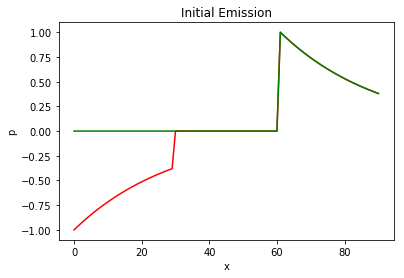

In [7]:
plt.figure()
plt.title("Initial Emission")
plt.xlabel("x")
plt.ylabel("p")
plt.plot(range(0, 91), estimator.emit_w_init_[0, 0, :], "-r")
plt.plot(range(0, 91), estimator.emit_w_init_[1, 0, :], "-g")
plt.show()

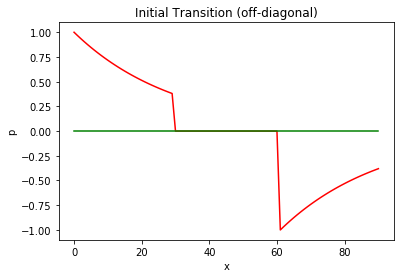

In [8]:
plt.figure()
plt.title("Initial Transition (off-diagonal)")
plt.xlabel("x")
plt.ylabel("p")
plt.plot(range(0, 91), estimator.trans_w_init_[0, 1, :], "-r")
plt.plot(range(0, 91), estimator.trans_w_init_[1, 0, :], "-g")
plt.show()

In [9]:
emit_w_final = output[0][-1]['emit_w'][0][0]
trans_w_final = output[0][-1]['trans_w'][0][0]

(2, 1, 91)
(2, 2, 91)


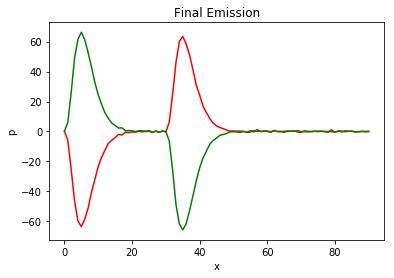

In [10]:
plt.figure()
plt.title("Final Emission")
plt.xlabel("x")
plt.ylabel("p")
plt.plot(range(0, 91), emit_w_final[0, 0, :], "-r")
plt.plot(range(0, 91), emit_w_final[1, 0, :], "-g")
plt.show()

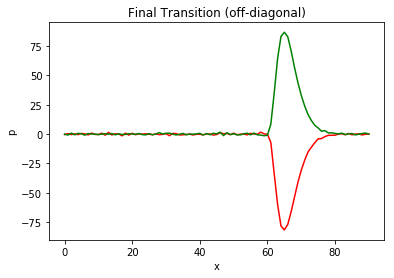

In [11]:
plt.figure()
plt.title("Final Transition (off-diagonal)")
plt.xlabel("x")
plt.ylabel("p")
plt.plot(range(0, 91), trans_w_final[0, 1, :], "-r")
plt.plot(range(0, 91), trans_w_final[1, 0, :], "-g")
plt.show()